In [84]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [69]:
import face_recognition

In [70]:
x = []

y = []


for filename in os.listdir(os.path.join(os.getcwd(), "64c5514934b192a36e68ab14")):
    print(filename)
    image = face_recognition.load_image_file(os.path.join(os.getcwd(), "64c5514934b192a36e68ab14", filename))
    
    face_locations = face_recognition.face_locations(image)
    
    img_cv2 = cv2.imread(os.path.join(os.getcwd(), f"64c5514934b192a36e68ab14/{filename}"))    
    
    top, right, bottom, left = face_locations[0]
    
    cropped_face = img_cv2[top:bottom, left:right]
    
    grayscale_image = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
    
    scaled_cropped_grayscale_image = cv2.resize(grayscale_image, (40, 40))
    
    x.append(scaled_cropped_grayscale_image)
    
    y.append(0)
                         

0.jpg
1.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg


In [71]:
for filename in os.listdir(os.path.join(os.getcwd(), "64c5783c513fe900cd712d52")):
    print(filename)
    image = face_recognition.load_image_file(os.path.join(os.getcwd(), "64c5783c513fe900cd712d52", filename))
    
    face_locations = face_recognition.face_locations(image)
    
    img_cv2 = cv2.imread(os.path.join(os.getcwd(), f"64c5783c513fe900cd712d52/{filename}"))
    
    top, right, bottom, left = face_locations[0]
    
    cropped_face = img_cv2[top:bottom, left:right]
    
    grayscale_image = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
    
    scaled_cropped_grayscale_image = cv2.resize(grayscale_image, (40, 40))
    
    x.append(scaled_cropped_grayscale_image)
        
    y.append(1)
                         

0.jpg
1.jpg
2.jpg


In [72]:
class_list = ['Wisdom', 'Joshua']

In [97]:
X = np.array(x)
Y = np.array(y)

Y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [56]:
# x = [numpy.array(i)/255.0 for i in x]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

len(x_train), len(y_train)

(8, 8)

In [87]:
numpy.array(x_train).shape

(8, 40, 40)

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 19, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 4096)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

In [104]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=30)

test_loss, test_acc = model.evaluate(x_test, y_test)

test_loss, test_acc

Epoch 1/30
1/1 [==============================] - 1s 903ms/step - loss: 0.2504 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 29ms/step - loss: 1.2661 - accuracy: 0.6250
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 0.3928 - accuracy: 0.6250
Epoch 4/30
1/1 [==============================] - 0s 25ms/step - loss: 0.1263 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 27ms/step - loss: 0.2798 - accuracy: 0.8750
Epoch 6/30
1/1 [==============================] - 0s 29ms/step - loss: 0.1588 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 28ms/step - loss: 0.1135 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 29ms/step - loss: 0.2133 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 29ms/step - loss: 0.0939 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 27ms/step - loss: 0.0864 - accuracy: 1.0000
Epoch 11/30
1/1 [===========

(0.10960393399000168, 1.0)

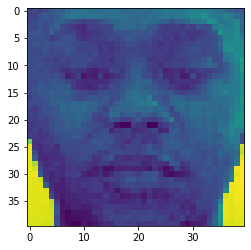

In [108]:
plt.imshow(x_test[1])

In [107]:
prediction = model.predict(x_test)

p = class_list[np.argmax(prediction[1])]

print(p, y_test[1])

1/1 [==============================] - 0s 30ms/step
Wisdom 0


In [109]:
model.save("tf_face_model.h5")